<a href="https://colab.research.google.com/github/tharun-kota/Deeplearning/blob/main/Deep_learning_Medical_insurance_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
 # let's try one hot encode our Dataframe so it's all numbers
 insurance_one_hot=pd.get_dummies(insurance)
 insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# create X & y values(features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [7]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8544.0840 - mae: 8544.0840
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7868.6348 - mae: 7868.6348
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7568.4634 - mae: 7568.4634
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7538.2266 - mae: 7538.2266
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7732.4224 - mae: 7732.4224
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7613.9658 - mae: 7613.9658
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.6113 - mae: 7582.6113
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7706.0703 - mae: 7706.0703
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7555.2871 - mae: 7555.2871
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7760.3628 - mae: 7760.3628

In [19]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7293.7349 - mae: 7293.7349


[7293.73486328125, 7293.73486328125]

 Right now it looks like our model isn't performing too well...lets try and improve it!

 To (try) improve our model,we'll run 2 experiments:
 1. Add an extra layer with more hidden units
 2. Train for longer

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_mdl_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_mdl_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_mdl_2.fit(X_train,y_train,epochs=100,verbose=0)

In [14]:
insurance_mdl_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4807.9307 - mae: 4807.9307


[4807.9306640625, 4807.9306640625]

In [20]:
# Insurance model 3

# set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_mdl_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.compile the model
insurance_mdl_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3.Fit the model
history=insurance_mdl_3.fit(X_train,y_train,epochs=200,verbose=0)



In [18]:
insurance_mdl_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 3495.6926 - mae: 3495.6926


[3495.692626953125, 3495.692626953125]

Text(0.5, 0, 'epochs')

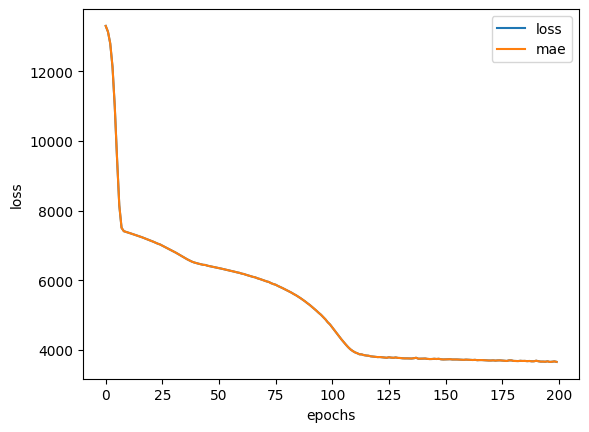

In [22]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data(normalization and standardiztaion)

In terms of scaling values,neural networks tend to prefer normalization

If you're not sure which to use, you could try both and see which performs better


In [23]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# To prepare our data, we can borrow a few classes from Scikit-learn

In [25]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transfer
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [26]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

# Build a neural network for normalized data


In [29]:
# set random state
tf.random.set_seed(42)

#1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13343.7246 - mae: 13343.7246
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13332.8975 - mae: 13332.8975
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13305.7891 - mae: 13305.7891
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13250.7529 - mae: 13250.7529
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13156.4521 - mae: 13156.4521
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13012.0596 - mae: 13012.0596
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12807.8018 - mae: 12807.8018
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12533.5488 - mae: 12533.5488
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12179.2822 - mae: 12179.2822
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11746.75

In [31]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 1s 6ms/step - loss: 3432.2903 - mae: 3432.2903


[3432.290283203125, 3432.290283203125]